In [1]:
# 📌 Suppress warnings and logs
import os
import warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Hide TensorFlow INFO/WARNING logs
warnings.filterwarnings("ignore", category=UserWarning)  # Suppress Keras UserWarnings

# 📦 Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model



In [2]:
data_path = "dataset2-master/images/TRAIN"


In [3]:
image_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2  # 80% train, 20% val
)

train_generator = image_gen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = image_gen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(4, activation='softmax')  # 4 blood cell classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │           5,124 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,263,108 (8.63 MB)

 Trainable params: 5,124 (20.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [5]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5  # You can increase to 10–20 for better accuracy
)


Epoch 1/5
249/249 ━━━━━━━━━━━━━━━━━━━━ 445s 2s/step - accuracy: 0.4783 - loss: 1.2005 - val_accuracy: 0.7149 - val_loss: 0.7722
Epoch 2/5
249/249 ━━━━━━━━━━━━━━━━━━━━ 352s 1s/step - accuracy: 0.7294 - loss: 0.7296 - val_accuracy: 0.7788 - val_loss: 0.6322
Epoch 3/5
249/249 ━━━━━━━━━━━━━━━━━━━━ 356s 1s/step - accuracy: 0.7962 - loss: 0.5922 - val_accuracy: 0.7898 - val_loss: 0.5924
Epoch 4/5
249/249 ━━━━━━━━━━━━━━━━━━━━ 345s 1s/step - accuracy: 0.8127 - loss: 0.5261 - val_accuracy: 0.8200 - val_loss: 0.5115
Epoch 5/5
249/249 ━━━━━━━━━━━━━━━━━━━━ 353s 1s/step - accuracy: 0.8408 - loss: 0.4724 - val_accuracy: 0.8245 - val_loss: 0.4849


In [7]:
model.save("Blood_Cell.keras")
print("✅ Model saved as Blood_Cell.keras")


✅ Model saved as Blood_Cell.keras


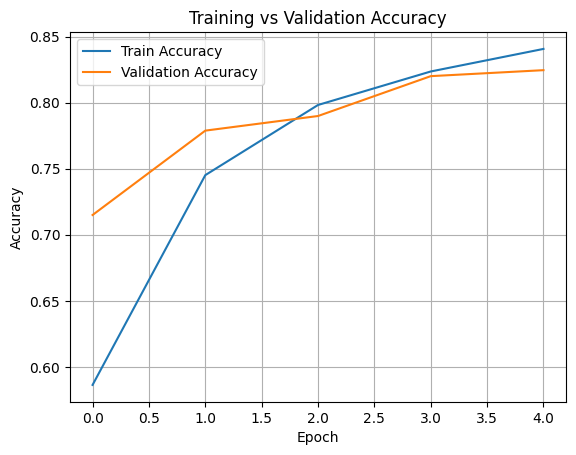

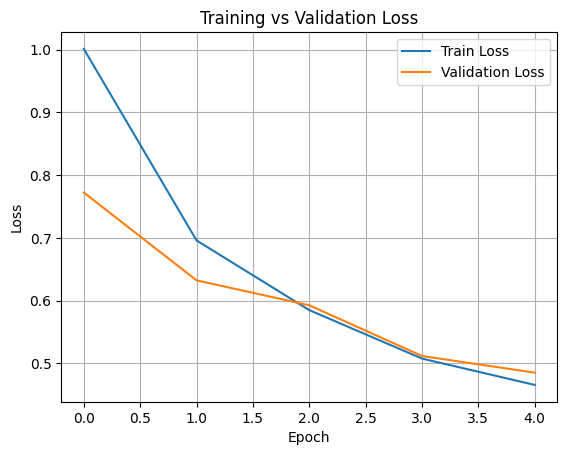

In [8]:
# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training vs validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
